# Esplorazione dati

## Importazione di dati, moduli e pacchetti

In [52]:
#Stile di visualizzazione plot fatti con matplotlib
%matplotlib inline

#Base
import os
import pandas as pd
import numpy as np
import scipy as sp
import time

#Visualizzazione
import matplotlib.pyplot as plt
from IPython.display import display
import seaborn as sn  #Per heatmap

#Preprocessing e altro
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_val_predict, GridSearchCV, ParameterGrid

#Modelli
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC as SupportVectorMachineClassifier
from sklearn.neural_network import MLPClassifier

#Metriche
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, make_scorer


In [53]:
#Inutili o da capire
from sklearn.tree import export_text
from sklearn.decomposition import TruncatedSVD
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [54]:
# IMPORT DATA
trainingData = pd.read_csv('../Data/diabetes_train.csv')
testData = pd.read_csv('../Data/diabetes_test.csv')

data = trainingData.copy()
display(data)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,Insulin_Sensitivity_Est,BMI_Glucose_Interaction,Random_Lab_Marker,diabetes
0,Male,64.822537,0,0,never,27.097915,6.517746,157.338059,1.220942,4262.942153,38.820127,1
1,Male,59.912290,1,0,never,33.206670,7.971341,148.625701,0.807652,4932.729931,40.381336,1
2,Male,67.853267,0,0,former,30.639790,8.919297,240.733664,1.225950,7372.749574,55.789060,1
3,Male,57.985607,0,0,never,32.609541,8.759698,154.640163,1.432736,5039.552869,40.877685,1
4,Male,70.278133,0,0,current,37.703827,6.261874,169.415511,0.684205,6267.482417,53.671280,1
...,...,...,...,...,...,...,...,...,...,...,...,...
583,Female,19.354174,0,0,former,28.670601,5.248329,160.905601,0.959618,4808.000000,52.632201,0
584,Female,70.000000,0,0,not current,24.750000,3.500000,159.000000,-1.084071,3935.250000,43.652306,0
585,Male,60.000000,0,1,current,29.050000,5.800000,145.000000,-0.468180,4212.250000,58.503956,0
586,Female,27.000000,0,0,No Info,27.320000,6.000000,200.000000,NaN,5464.000000,60.704415,0


In [77]:
data[data['HbA1c_level']<0]

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,Insulin_Sensitivity_Est,BMI_Glucose_Interaction,Random_Lab_Marker,diabetes


## Esplorazione dati

In [55]:
print('TRAINING SET')
trainingData.info()
print('\nTEST SET')
testData.info()
print()

TRAINING SET
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588 entries, 0 to 587
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   gender                   588 non-null    object 
 1   age                      588 non-null    float64
 2   hypertension             588 non-null    int64  
 3   heart_disease            588 non-null    int64  
 4   smoking_history          588 non-null    object 
 5   bmi                      588 non-null    float64
 6   HbA1c_level              588 non-null    float64
 7   blood_glucose_level      588 non-null    float64
 8   Insulin_Sensitivity_Est  477 non-null    float64
 9   BMI_Glucose_Interaction  588 non-null    float64
 10  Random_Lab_Marker        588 non-null    float64
 11  diabetes                 588 non-null    int64  
dtypes: float64(7), int64(3), object(2)
memory usage: 55.3+ KB

TEST SET
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148

Valori mancanti solamente per l'attributo "Insulin_Sensitivity_Est

In [56]:
print('Categorical features: ')
print(data.select_dtypes(exclude=['float','int']).columns)

Categorical features: 
Index(['gender', 'smoking_history'], dtype='object')


### Diabete

In [57]:
values, count = np.unique(data['diabetes'].values, return_counts=True)  #Find unique values and their count
display(pd.DataFrame({'Values': values, 'Count': count}).sort_values(by='Count', ascending=False).set_index('Values'))

,Count
Values,
0,441
1,147


### Gender

In [58]:
values, count = np.unique(data['gender'].values, return_counts=True)  #Find unique values and their count
display(pd.DataFrame({'Values': values, 'Count': count}).sort_values(by='Count', ascending=False).set_index('Values'))

,Count
Values,
Male,295
Female,293


I dati sono distribuiti in modo omogeneo sulla base del genere.

In [59]:
#Map to integers
data['gender'] = data['gender'].map(lambda x: 0 if x=='Female' else 1)

### Smoking history

In [60]:
values, count = np.unique(data['smoking_history'].values, return_counts=True)  #Find unique values and their count
display(pd.DataFrame({'Values': values, 'Count': count}).sort_values(by='Count', ascending=False).set_index('Values'))

,Count
Values,
never,206
No Info,192
former,81
current,58
not current,32
ever,19


I dati non sono distribuiti in modo omogeneo sulla base dell'abitudine al fumo.

In [61]:
#Encoding smoking data
data_ohe = pd.get_dummies(data)
display(data_ohe)

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,Insulin_Sensitivity_Est,BMI_Glucose_Interaction,Random_Lab_Marker,diabetes,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,1,64.822537,0,0,27.097915,6.517746,157.338059,1.220942,4262.942153,38.820127,1,False,False,False,False,True,False
1,1,59.912290,1,0,33.206670,7.971341,148.625701,0.807652,4932.729931,40.381336,1,False,False,False,False,True,False
2,1,67.853267,0,0,30.639790,8.919297,240.733664,1.225950,7372.749574,55.789060,1,False,False,False,True,False,False
3,1,57.985607,0,0,32.609541,8.759698,154.640163,1.432736,5039.552869,40.877685,1,False,False,False,False,True,False
4,1,70.278133,0,0,37.703827,6.261874,169.415511,0.684205,6267.482417,53.671280,1,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
583,0,19.354174,0,0,28.670601,5.248329,160.905601,0.959618,4808.000000,52.632201,0,False,False,False,True,False,False
584,0,70.000000,0,0,24.750000,3.500000,159.000000,-1.084071,3935.250000,43.652306,0,False,False,False,False,False,True
585,1,60.000000,0,1,29.050000,5.800000,145.000000,-0.468180,4212.250000,58.503956,0,False,True,False,False,False,False
586,0,27.000000,0,0,27.320000,6.000000,200.000000,NaN,5464.000000,60.704415,0,True,False,False,False,False,False


### Variabili binarie

#### Hypertension

In [62]:
values, count = np.unique(data['hypertension'].values, return_counts=True)  #Find unique values and their count
display(pd.DataFrame({'Values': values, 'Count': count}).sort_values(by='Count', ascending=False).set_index('Values'))

,Count
Values,
0,542
1,46


#### Heart disease

In [63]:
values, count = np.unique(data['heart_disease'].values, return_counts=True)  #Find unique values and their count
display(pd.DataFrame({'Values': values, 'Count': count}).sort_values(by='Count', ascending=False).set_index('Values'))

,Count
Values,
0,568
1,20


Entrambi gli attriuti presentano pochi campioni in proporzione con la data caratteristica.

### Age

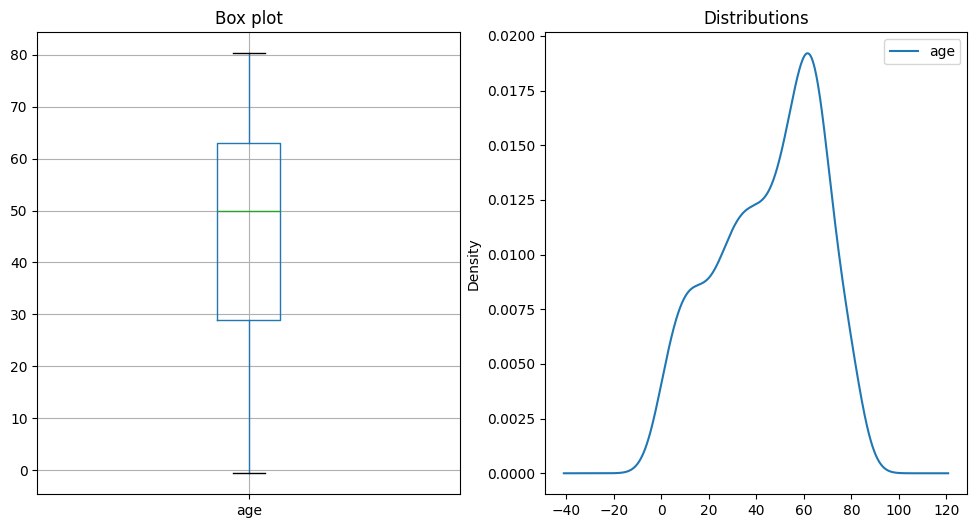

In [64]:
fig, axs = plt.subplots(1,2, figsize=(12,6))
data[['age']].boxplot(ax=axs[0])
axs[0].set_title('Box plot')
data[['age']].plot.density(ax=axs[1],legend=True)
axs[1].set_title('Distributions')
plt.show()

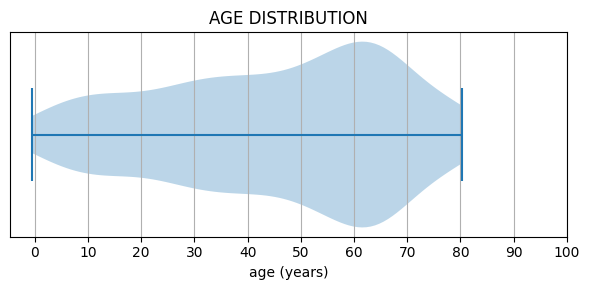

In [65]:
plt.figure(figsize=(6,3))
plt.title('AGE DISTRIBUTION')
plt.violinplot(data['age'].values, orientation='horizontal')
plt.xticks(np.linspace(0,100,11))
plt.yticks([])
plt.xlabel('age (years)')
plt.grid()
plt.tight_layout()
#plt.savefig('age_distribution_violin',dpi=300)
plt.show()

Possiamo notare come ci sia un picco di pazienti intorno ai 60 anni di età, nonostante tutte le età siano rappresentate.

### Indice di massa corporea,  livello di emoglobina glicata,  livello di glucosio nel sangue, stima della sensibilità all'insulina e interazione tra BMI e glucosio

INDICE DI MASSA CORPOREA


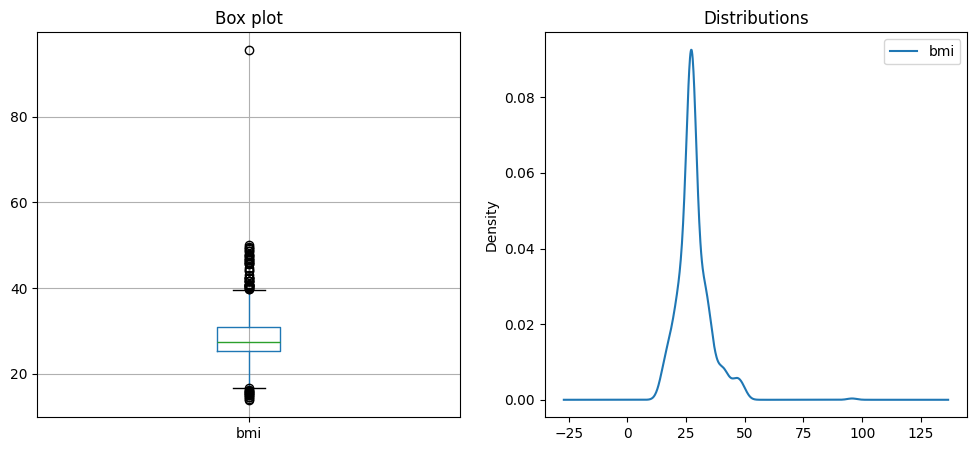

LIVELLO DI EMOGLOBINA GLICATA


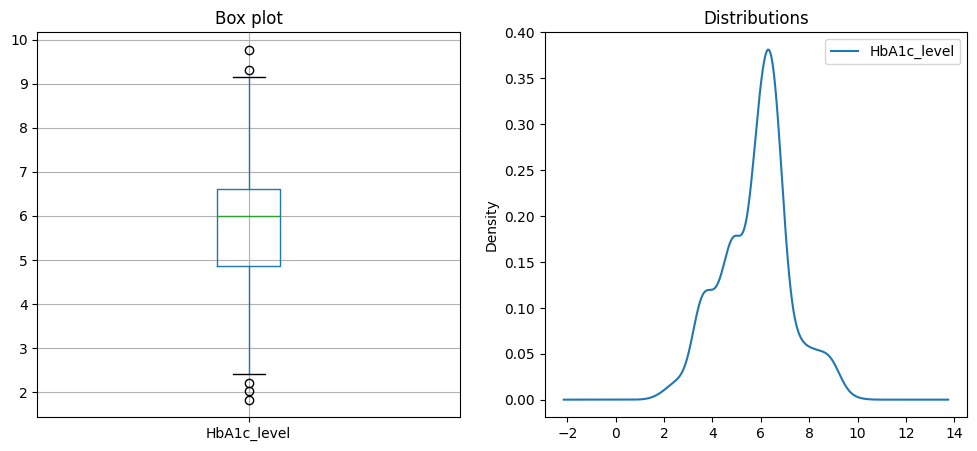

LIVELLO DI GLUCOSIO NEL SANGUE


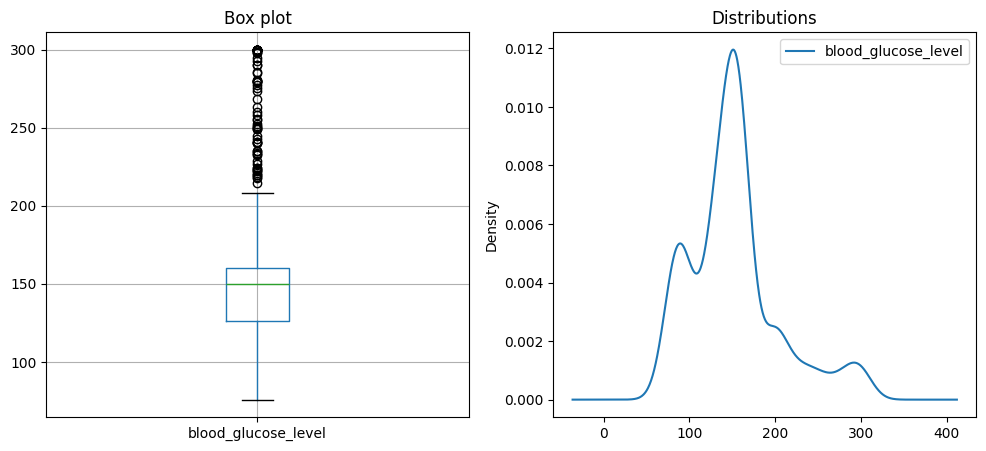

STIMA DELLA SENSIBILITA' ALL'INSULINA


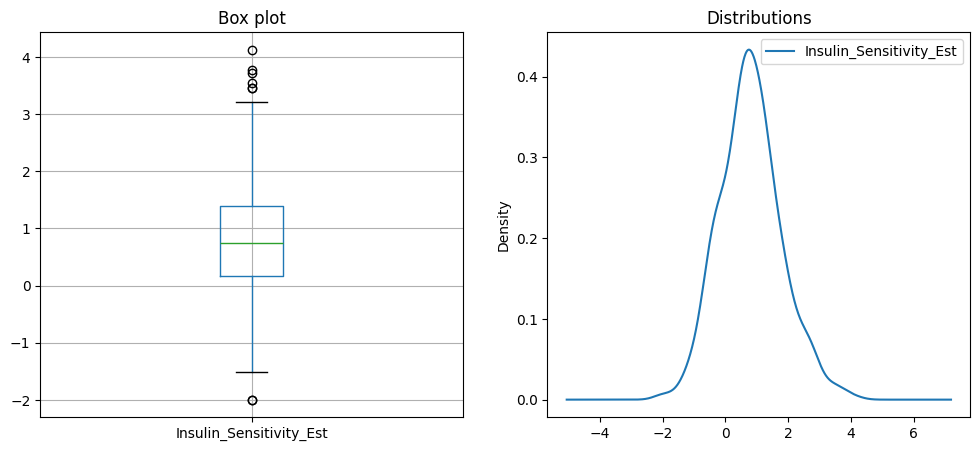

INTERAZIONE TRA BMI E GLUCOSIO


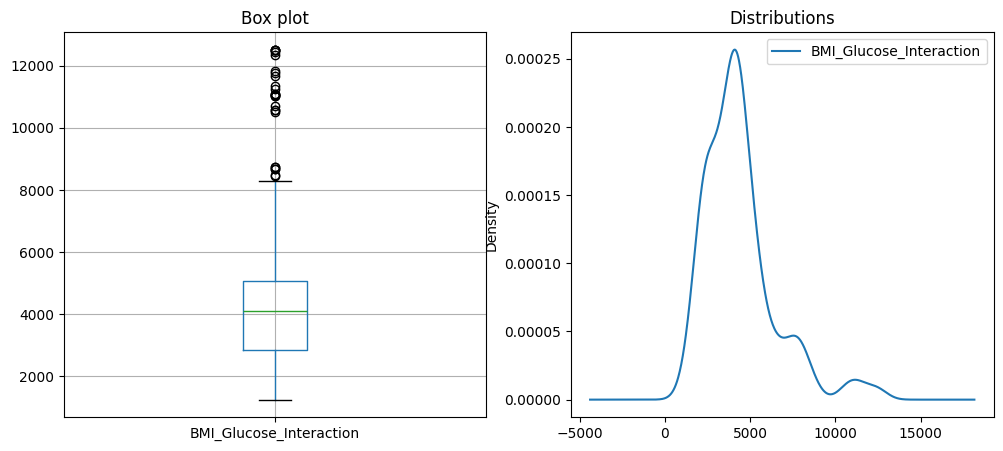

In [66]:
print('INDICE DI MASSA CORPOREA')
fig, axs = plt.subplots(1,2, figsize=(12,5))
data[['bmi']].boxplot(ax=axs[0])
axs[0].set_title('Box plot')
data[['bmi']].plot.density(ax=axs[1],legend=True)
axs[1].set_title('Distributions')
plt.show()

print('LIVELLO DI EMOGLOBINA GLICATA')
fig, axs = plt.subplots(1,2, figsize=(12,5))
data[['HbA1c_level']].boxplot(ax=axs[0])
axs[0].set_title('Box plot')
data[['HbA1c_level']].plot.density(ax=axs[1],legend=True)
axs[1].set_title('Distributions')
plt.show()

print('LIVELLO DI GLUCOSIO NEL SANGUE')
fig, axs = plt.subplots(1,2, figsize=(12,5))
data[['blood_glucose_level']].boxplot(ax=axs[0])
axs[0].set_title('Box plot')
data[['blood_glucose_level']].plot.density(ax=axs[1],legend=True)
axs[1].set_title('Distributions')
plt.show()

print("STIMA DELLA SENSIBILITA' ALL'INSULINA")
fig, axs = plt.subplots(1,2, figsize=(12,5))
data[['Insulin_Sensitivity_Est']].boxplot(ax=axs[0])
axs[0].set_title('Box plot')
data[['Insulin_Sensitivity_Est']].plot.density(ax=axs[1],legend=True)
axs[1].set_title('Distributions')
plt.show()

print("INTERAZIONE TRA BMI E GLUCOSIO")
fig, axs = plt.subplots(1,2, figsize=(12,5))
data[['BMI_Glucose_Interaction']].boxplot(ax=axs[0])
axs[0].set_title('Box plot')
data[['BMI_Glucose_Interaction']].plot.density(ax=axs[1],legend=True)
axs[1].set_title('Distributions')
plt.show()

In [67]:
print("L'indice di massa corporea massimo è:", np.max(data['bmi']))

L'indice di massa corporea massimo è: 95.69


E' possibile riconoscere degli outliers.\
L'indice di massa corporea di 95.69 è probabilmente un errore nella raccolta del dato oppure una casistica talmente particolare da poter essere esclusa dalla trattazione. L'uomo con il più alto indice di massa corporea registrato pesava 362kg con un BMI=105,3, alla fine del Novecento.

INTERAZIONE TRA BMI E GLUCOSIO


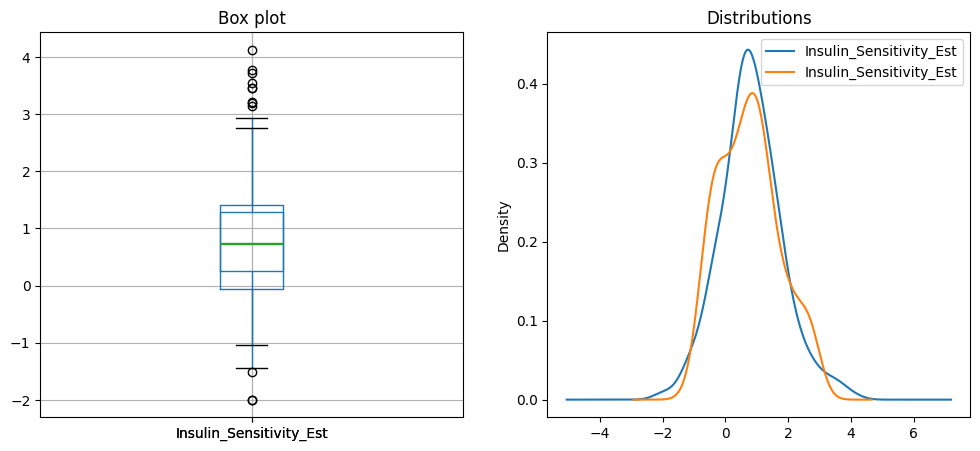

In [70]:
print("INTERAZIONE TRA BMI E GLUCOSIO")
fig, axs = plt.subplots(1,2, figsize=(12,5))
data[data['diabetes']==0][['Insulin_Sensitivity_Est']].boxplot(ax=axs[0])
data[data['diabetes']==1][['Insulin_Sensitivity_Est']].boxplot(ax=axs[0])
axs[0].set_title('Box plot')
data[data['diabetes']==0][['Insulin_Sensitivity_Est']].plot.density(ax=axs[1],legend=True)
data[data['diabetes']==1][['Insulin_Sensitivity_Est']].plot.density(ax=axs[1],legend=True)
axs[1].set_title('Distributions')
plt.show()

### Random lab marker

RANDOM LAB MARKER


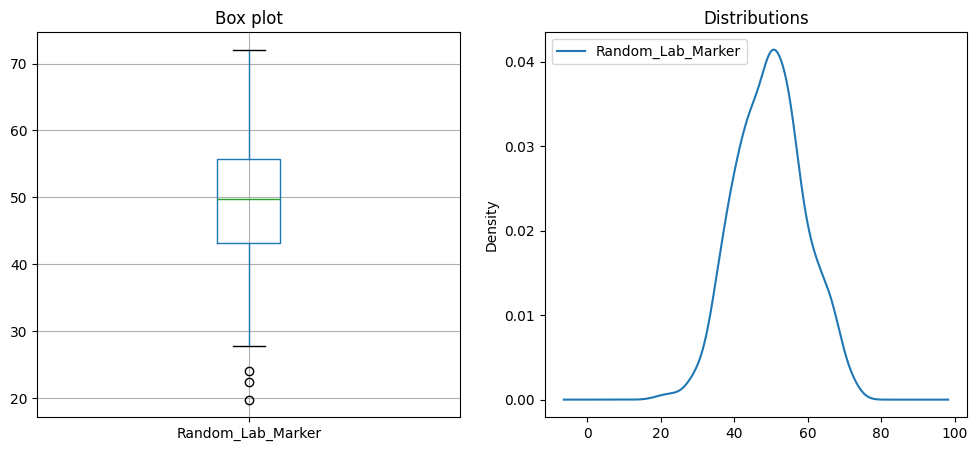

In [47]:
print('RANDOM LAB MARKER')
fig, axs = plt.subplots(1,2, figsize=(12,5))
data[['Random_Lab_Marker']].boxplot(ax=axs[0])
axs[0].set_title('Box plot')
data[['Random_Lab_Marker']].plot.density(ax=axs[1],legend=True)
axs[1].set_title('Distributions')
plt.show()

### Correlazione

#### Elaborazione provvisoria dei dati 

Sostituito i dati mancanti con 0 e rimosso l'outlier su il BMI.

In [48]:
data_noNull = data_ohe.fillna(0)
data_noNull_noOut = data_noNull[data_noNull['bmi']<60]
display(data_noNull_noOut)

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,Insulin_Sensitivity_Est,BMI_Glucose_Interaction,Random_Lab_Marker,diabetes,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,1,64.822537,0,0,27.097915,6.517746,157.338059,1.220942,4262.942153,38.820127,1,False,False,False,False,True,False
1,1,59.912290,1,0,33.206670,7.971341,148.625701,0.807652,4932.729931,40.381336,1,False,False,False,False,True,False
2,1,67.853267,0,0,30.639790,8.919297,240.733664,1.225950,7372.749574,55.789060,1,False,False,False,True,False,False
3,1,57.985607,0,0,32.609541,8.759698,154.640163,1.432736,5039.552869,40.877685,1,False,False,False,False,True,False
4,1,70.278133,0,0,37.703827,6.261874,169.415511,0.684205,6267.482417,53.671280,1,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
583,0,19.354174,0,0,28.670601,5.248329,160.905601,0.959618,4808.000000,52.632201,0,False,False,False,True,False,False
584,0,70.000000,0,0,24.750000,3.500000,159.000000,-1.084071,3935.250000,43.652306,0,False,False,False,False,False,True
585,1,60.000000,0,1,29.050000,5.800000,145.000000,-0.468180,4212.250000,58.503956,0,False,True,False,False,False,False
586,0,27.000000,0,0,27.320000,6.000000,200.000000,0.000000,5464.000000,60.704415,0,True,False,False,False,False,False


<Axes: >

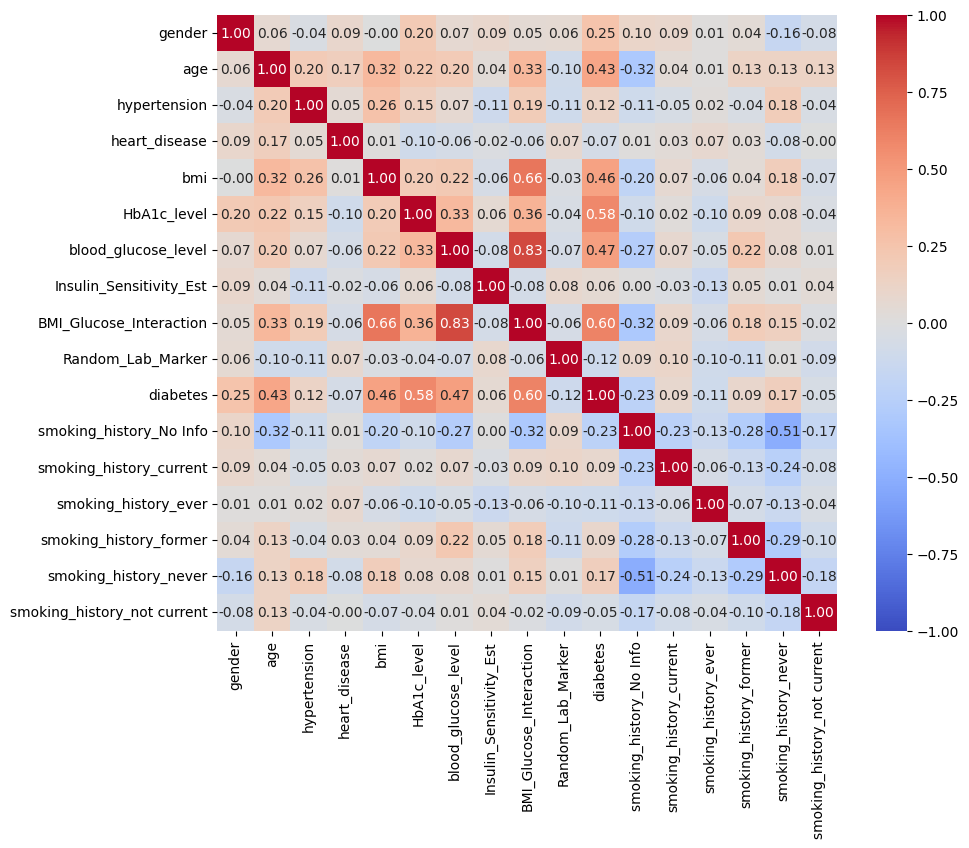

In [49]:
#Spearman correlation between features
res = sp.stats.spearmanr(data_noNull_noOut)
corr_matrix = pd.DataFrame(res.statistic, index=data_noNull_noOut.columns, columns=data_noNull_noOut.columns)
plt.figure(figsize=(10, 8))
sn.heatmap(corr_matrix, vmin=-1, vmax=1, annot=True, fmt=".2f", cmap='coolwarm')

Come ci aspettavamo, c'è un'alta correlazione tra l'interazione BMI-glucosio ed entrambi il livello di glucosio e l'indice di massa corporea.\
La presenza del diabete ha una buona correlazione con il livello di emoglobina glicata.

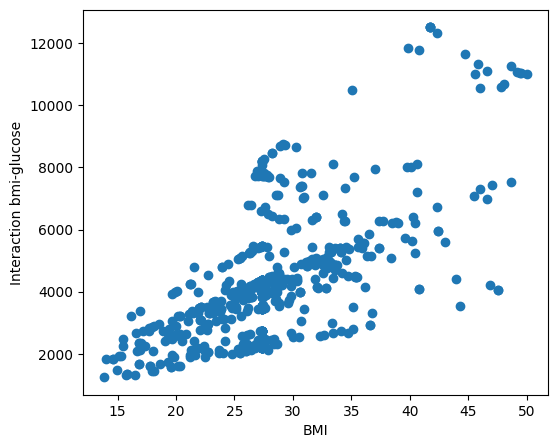

In [50]:
fig = plt.figure(figsize=(6,5))
plt.scatter(data_noNull_noOut['bmi'], data_noNull_noOut['BMI_Glucose_Interaction'])
plt.xlabel('BMI')
plt.ylabel('Interaction bmi-glucose')
plt.show()

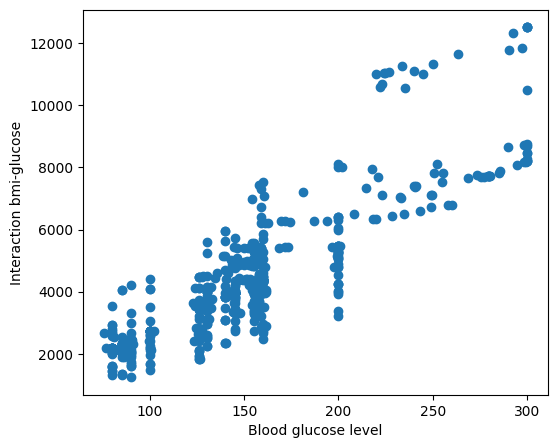

In [51]:
fig = plt.figure(figsize=(6,5))
plt.scatter(data_noNull_noOut['blood_glucose_level'], data_noNull_noOut['BMI_Glucose_Interaction'])
plt.xlabel('Blood glucose level')
plt.ylabel('Interaction bmi-glucose')
plt.show()

Anche dagli scatter plot si nota una correlazione positiva lineare.

## Gestione dei dati mancanti

Fissare dati mancanti a zero (o valore standard di sensibilità all'insulina)

## Feature selection

Togliere l'interazione tra livello di glucosio e indice di massa corporea. Provare poi eventualmente ad aggiungerlo nuovamente in seguito. Provare con PCA\
Capire di cosa si tratti il Random lab marker.

## Outliers

Rimuovere outlier su BMI. Valutare come gestire altri outlier.

## Valutare discretization, normalization (model dependent)

## Model dependent feature selection

## Esplorazione test

In [79]:
display(testData)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,Insulin_Sensitivity_Est,BMI_Glucose_Interaction,Random_Lab_Marker,diabetes
0,Male,73.000000,0,0,former,27.320000,8.800000,300.000000,1.874574,8196.000000,51.907693,1
1,Female,54.791161,0,0,never,33.886115,4.206372,133.258655,0.264573,4443.949514,61.987489,1
2,Male,71.625296,0,0,No Info,27.334942,8.764138,298.804605,1.927612,8167.525687,51.776353,1
3,Male,64.860037,0,0,never,27.157262,6.503817,159.567388,1.388626,4329.812897,43.721297,1
4,Female,54.753378,0,0,never,40.090237,6.272635,300.000000,0.601001,12027.071071,54.576024,1
...,...,...,...,...,...,...,...,...,...,...,...,...
143,Female,49.000000,0,0,never,26.880000,5.000000,130.000000,NaN,3494.400000,37.433717,0
144,Female,54.000000,0,0,never,27.320000,5.700000,100.000000,0.439735,2732.000000,57.341251,0
145,Female,37.000000,0,0,No Info,27.320000,5.000000,140.000000,1.346416,3824.800000,45.839022,0
146,Female,12.029322,0,0,No Info,27.266355,4.108126,159.963686,-0.630595,4371.200000,62.910764,0
